## Project Setup

In [216]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from pathlib import Path

In [217]:
pd.plotting.register_matplotlib_converters()

In [218]:
datasets_dir = str(Path(os.path.abspath('')).parent.joinpath("datasets"))

## Insurange Charges Dataset

In [219]:
insurance_df = pd.read_csv(f"{datasets_dir}/insurance.csv")

In [220]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Scatter Plot

Text(0.5, 1.0, 'Insurance Charges over BMI')

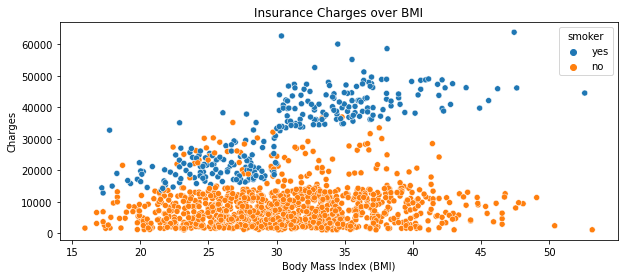

In [221]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=insurance_df['bmi'], 
                y=insurance_df['charges'],
                hue=insurance_df['smoker'])

plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Charges")
plt.title("Insurance Charges over BMI")

### Scatter Plot with Linear Regression Model Line

Text(0.5, 1.0, 'Insurance Charges x BMI Correlation')

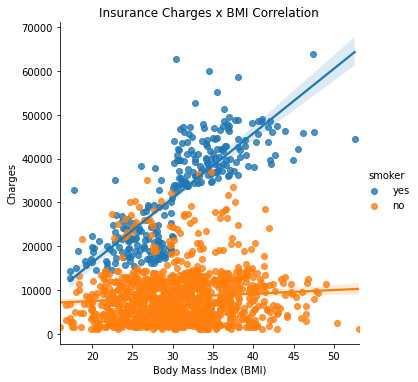

In [222]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_df)

plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Charges")
plt.title("Insurance Charges x BMI Correlation")

### Categorical Scatter Plot

/usr/local/conda/envs/default/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Charges over Smoker and Non-smoker')

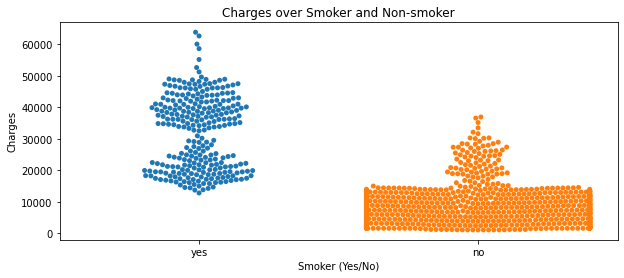

In [223]:
plt.figure(figsize=(10, 4))
sns.swarmplot(x=insurance_df['smoker'],
              y=insurance_df['charges'])

plt.xlabel("Smoker (Yes/No)")
plt.ylabel("Charges")
plt.title("Charges over Smoker and Non-smoker")

## Crowdsourced Favorite Candies

In [224]:
candy_df = pd.read_csv(f"{datasets_dir}/candy.csv", index_col='id')

In [225]:
candy_df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


In [226]:
candy_df[['competitorname', 'winpercent', 'sugarpercent']]

,competitorname,winpercent,sugarpercent
id,,,
0,100 Grand,66.971725,0.732
1,3 Musketeers,67.602936,0.604
2,Air Heads,52.341465,0.906
3,Almond Joy,50.347546,0.465
4,Baby Ruth,56.914547,0.604
...,...,...,...
78,Twizzlers,45.466282,0.220
79,Warheads,39.011898,0.093
80,Welch's Fruit Snacks,44.375519,0.313


### Sugar Percent x Market Share Correlation

#### Scatter Plot

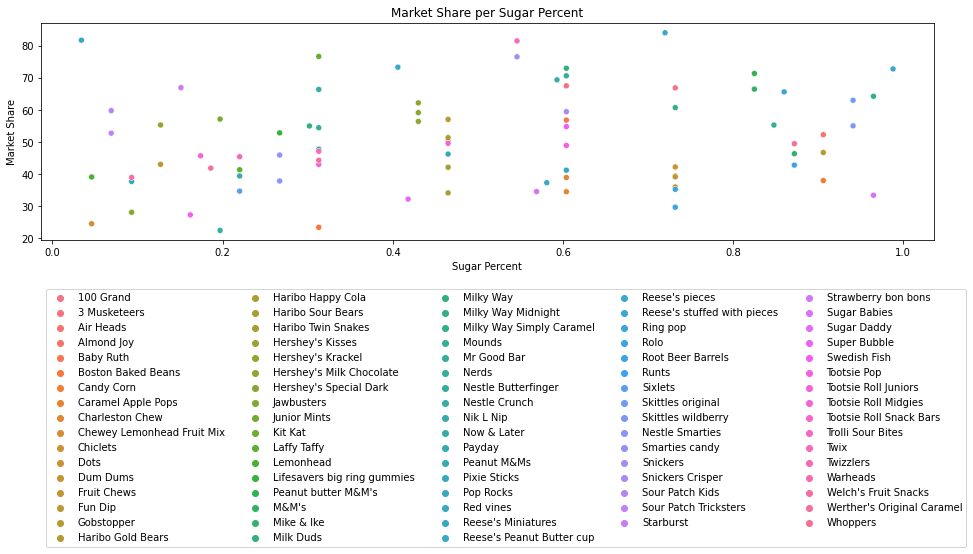

In [227]:
plt.figure(figsize=(16, 4))
sns.scatterplot(x='sugarpercent',
                y='winpercent',
                hue='competitorname',
                data=candy_df)

plt.xlabel("Sugar Percent")
plt.ylabel("Market Share")
plt.title("Market Share per Sugar Percent")
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.2), ncol=5)

#### Scatter Plot with Linear Regression 

Text(0.5, 1.0, 'Market Share x Sugar Percent Correlation')

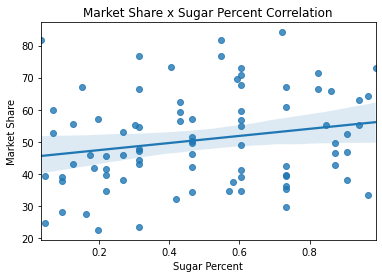

In [228]:
sns.regplot(x='sugarpercent',
            y='winpercent',
            data=candy_df)

plt.xlabel("Sugar Percent")
plt.ylabel("Market Share")
plt.title("Market Share x Sugar Percent Correlation")

#### Interpretation:
The correlation between "Sugar Percent" and "Market Share" is slighly positive, meaning that people have a slight preference for candies with more sugar

### Price Percent x Market Share Correlation

#### Scatter Plot

Text(0.5, 1.0, 'Market Share per Price Percent (Chocolate vs Non-chocolate)')

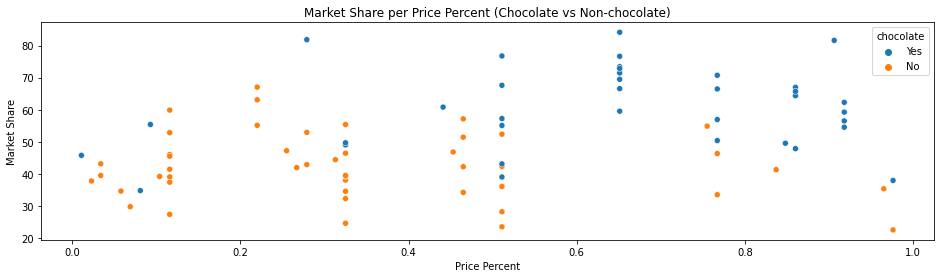

In [229]:
plt.figure(figsize=(16, 4))
sns.scatterplot(x='pricepercent',
                y='winpercent',
                hue='chocolate',
                data=candy_df)

plt.xlabel("Price Percent")
plt.ylabel("Market Share")
plt.title("Market Share per Price Percent (Chocolate vs Non-chocolate)")

#### Scatter Plot with Linear Regression 

Text(0.5, 1.0, 'Market Share x Price Percent Correlation')

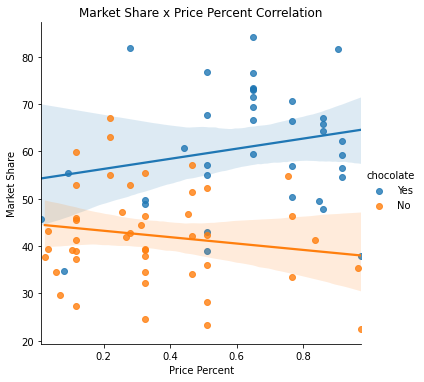

In [230]:
sns.lmplot(x='pricepercent',
           y='winpercent',
           hue='chocolate',
           data=candy_df)

plt.xlabel("Price Percent")
plt.ylabel("Market Share")
plt.title("Market Share x Price Percent Correlation")

#### Interpretation:
For candies that has chocolate in their formula, there's a moderate positive correlation between "Price Percent" and "Market Share", meaning the higher the price the higher the interest on that candy.

On the other hand, candies without chocolate show an moderate negative correlation between the two variables. And, thus, meaning, the higher the price, the lower the internet.

## Chocolate x Market Share Correlation

### Categorial Plot

Text(0.5, 1.0, 'Market Share x Chocolate-based Candies')

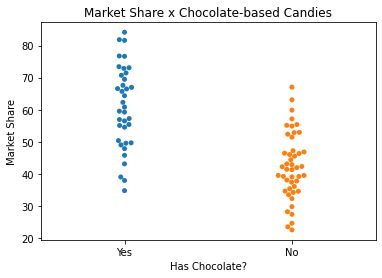

In [231]:
sns.swarmplot(x='chocolate',
              y='winpercent',
              data=candy_df)

plt.xlabel("Has Chocolate?")
plt.ylabel("Market Share")
plt.title("Market Share x Chocolate-based Candies")

#### Interpretation:
The categorial chart (swarm), although minimalistic, provides enough insight so we can see that candies containing chocolate have a better overall market share/adoption than the ones that don't have it.